# MVP Comunidad Valenciana with Target Encoding

<img src="../images/03.jpg" width="600"/>

Acceso rápido:
- [Feature engineering](#features)
- [Enconding con `target encoding`](#encoding)
- [Machine Learning](#ml)
- [Results](#results)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime as dt
from tools import dataoveriew, plot_roc_curve, plot_confusion_matrix
from datetime import datetime
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import pickle

# Using Activo and Baja for 0 and 1 (confusion matrix)   
class_names = ['Activo','Baja']

pd.options.display.max_columns = None

%matplotlib inline

In [2]:
data = pd.read_excel('../data/portfolio_com_valencia.xlsx')
data['Cliente'] = data['Cliente'].astype('str')
data.head()

Fecha Alta Cliente Modelo Caldera Provincia  Gender    Pais  Born Date  \
0 2014-01-01      17         Biasi   Alicante  Hombre  España 1973-05-19   
1 2014-01-01      54         Biasi   Alicante  Hombre  España 1976-05-08   
2 2014-01-01      84         Biasi   Valencia  Hombre  España 1982-03-15   
3 2014-01-01     103         Biasi   Alicante  Hombre  España 1976-02-02   
4 2014-01-01     110         Biasi   Alicante   Mujer  España 1989-07-31   

    Tipo Propiedad Situacion Laboral Estado Civil  Ingresos  Pagos Anuales  \
0  Propiedad Total          Autonomo       Casado      2500             14   
1  Propiedad Total            Parado      Soltero      1200             14   
2  Propiedad Total  Trabajo Temporal      Soltero       800             14   
3  Propiedad Total          Autonomo       Casado      1500             12   
4  Propiedad Total            Parado      Soltero      1000             12   

  Fecha Estado  Estado Tipo Inmueble  Financiado Precio Contado  Precio Total  \
0   2016-09-14       1          Casa  Financiado    Promo 0 EUR           399   
1   2016-12-29       1          Piso  Financiado    Promo 0 EUR           399   
2   2017-02-24       1          Casa  Financiado    0 - 100 EUR           399   
3   2014-01-01       0          Casa  Financiado    Promo 0 EUR           399   
4   2017-03-11       1          Piso  Financiado    Promo 0 EUR           399   

   Quejas  Incidencias  Consumo Mes  
0       1            0       441.63  
1       0            0       152.57  
2       1            0       288.73  
3       1            0       103.97  
4       0            8       145.43

In [3]:
data.shape

(55227, 21)

<a id='features'></a>
## Feature engineering

Se crean las mismas variables que en el notebook anterior, aplicando los mismos criterios, creando archivos `.pkl` en algunas de las transformaciones para ser utilizados en el notebook 04.

- `Edad` en años y rangos de edad.
- Rango de `Income`.
- Escalado de `Incidencias` y `Quejas`.
- Escalado de `Consumo Mes`.

- Rangos de Edad:

In [4]:
data.columns

Index(['Fecha Alta', 'Cliente', 'Modelo Caldera', 'Provincia', 'Gender',
       'Pais', 'Born Date', 'Tipo Propiedad', 'Situacion Laboral',
       'Estado Civil', 'Ingresos', 'Pagos Anuales', 'Fecha Estado', 'Estado',
       'Tipo Inmueble', 'Financiado', 'Precio Contado', 'Precio Total',
       'Quejas', 'Incidencias', 'Consumo Mes'],
      dtype='object')

In [5]:
data['Born Date'].isnull().sum()

226

In [6]:
data['Born Date'] = data['Born Date'].replace(np.nan, datetime(1970, 1, 1))

data.head()

Fecha Alta Cliente Modelo Caldera Provincia  Gender    Pais  Born Date  \
0 2014-01-01      17         Biasi   Alicante  Hombre  España 1973-05-19   
1 2014-01-01      54         Biasi   Alicante  Hombre  España 1976-05-08   
2 2014-01-01      84         Biasi   Valencia  Hombre  España 1982-03-15   
3 2014-01-01     103         Biasi   Alicante  Hombre  España 1976-02-02   
4 2014-01-01     110         Biasi   Alicante   Mujer  España 1989-07-31   

    Tipo Propiedad Situacion Laboral Estado Civil  Ingresos  Pagos Anuales  \
0  Propiedad Total          Autonomo       Casado      2500             14   
1  Propiedad Total            Parado      Soltero      1200             14   
2  Propiedad Total  Trabajo Temporal      Soltero       800             14   
3  Propiedad Total          Autonomo       Casado      1500             12   
4  Propiedad Total            Parado      Soltero      1000             12   

  Fecha Estado  Estado Tipo Inmueble  Financiado Precio Contado  Precio Total  \
0   2016-09-14       1          Casa  Financiado    Promo 0 EUR           399   
1   2016-12-29       1          Piso  Financiado    Promo 0 EUR           399   
2   2017-02-24       1          Casa  Financiado    0 - 100 EUR           399   
3   2014-01-01       0          Casa  Financiado    Promo 0 EUR           399   
4   2017-03-11       1          Piso  Financiado    Promo 0 EUR           399   

   Quejas  Incidencias  Consumo Mes  
0       1            0       441.63  
1       0            0       152.57  
2       1            0       288.73  
3       1            0       103.97  
4       0            8       145.43

In [7]:
data['Born Date'].isnull().sum()

0

In [8]:
# Edad en el momento del alta

data['Edad'] = ((data['Fecha Alta'] - data['Born Date']).dt.days)/365
                        
data.head()

Fecha Alta Cliente Modelo Caldera Provincia  Gender    Pais  Born Date  \
0 2014-01-01      17         Biasi   Alicante  Hombre  España 1973-05-19   
1 2014-01-01      54         Biasi   Alicante  Hombre  España 1976-05-08   
2 2014-01-01      84         Biasi   Valencia  Hombre  España 1982-03-15   
3 2014-01-01     103         Biasi   Alicante  Hombre  España 1976-02-02   
4 2014-01-01     110         Biasi   Alicante   Mujer  España 1989-07-31   

    Tipo Propiedad Situacion Laboral Estado Civil  Ingresos  Pagos Anuales  \
0  Propiedad Total          Autonomo       Casado      2500             14   
1  Propiedad Total            Parado      Soltero      1200             14   
2  Propiedad Total  Trabajo Temporal      Soltero       800             14   
3  Propiedad Total          Autonomo       Casado      1500             12   
4  Propiedad Total            Parado      Soltero      1000             12   

  Fecha Estado  Estado Tipo Inmueble  Financiado Precio Contado  Precio Total  \
0   2016-09-14       1          Casa  Financiado    Promo 0 EUR           399   
1   2016-12-29       1          Piso  Financiado    Promo 0 EUR           399   
2   2017-02-24       1          Casa  Financiado    0 - 100 EUR           399   
3   2014-01-01       0          Casa  Financiado    Promo 0 EUR           399   
4   2017-03-11       1          Piso  Financiado    Promo 0 EUR           399   

   Quejas  Incidencias  Consumo Mes       Edad  
0       1            0       441.63  40.649315  
1       0            0       152.57  37.676712  
2       1            0       288.73  31.821918  
3       1            0       103.97  37.939726  
4       0            8       145.43  24.438356

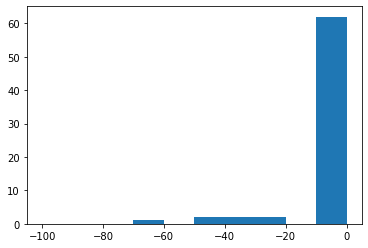

In [9]:
plt.hist(data['Edad'], range = (-100,0));

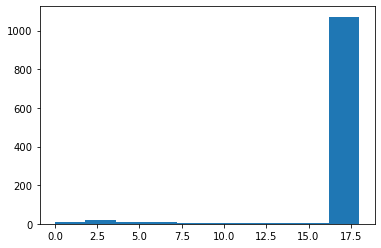

In [10]:
plt.hist(data['Edad'], range = (0,18));

In [11]:
edad_mean = data['Edad'].mean()
edad_mean

49.411166614701536

In [12]:
data['Edad'] = data['Edad'].apply(lambda x: edad_mean if x<18 else x)

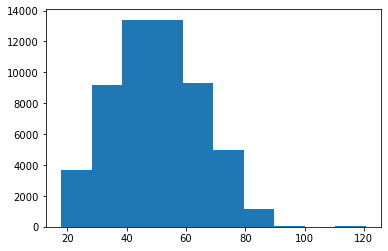

In [13]:
plt.hist(data['Edad']);

In [14]:
# Mapping Edad 
data.loc[data['Edad'] <= 30, 'Rango_Edad'] = "18-30"
data.loc[(data['Edad'] > 30) & (data['Edad'] <= 40), 'Rango_Edad'] = "30-40"
data.loc[(data['Edad'] > 40) & (data['Edad'] <= 50), 'Rango_Edad'] = "40-50"
data.loc[(data['Edad'] > 50) & (data['Edad'] <= 60), 'Rango_Edad'] = "50-60"
data.loc[(data['Edad'] > 60) & (data['Edad'] <= 70), 'Rango_Edad'] = "60-70"
data.loc[(data['Edad'] > 70) & (data['Edad'] <= 80), 'Rango_Edad'] = "70-80"
data.loc[data['Edad'] > 80, 'Rango_Edad'] = "+80"
data.head()

Fecha Alta Cliente Modelo Caldera Provincia  Gender    Pais  Born Date  \
0 2014-01-01      17         Biasi   Alicante  Hombre  España 1973-05-19   
1 2014-01-01      54         Biasi   Alicante  Hombre  España 1976-05-08   
2 2014-01-01      84         Biasi   Valencia  Hombre  España 1982-03-15   
3 2014-01-01     103         Biasi   Alicante  Hombre  España 1976-02-02   
4 2014-01-01     110         Biasi   Alicante   Mujer  España 1989-07-31   

    Tipo Propiedad Situacion Laboral Estado Civil  Ingresos  Pagos Anuales  \
0  Propiedad Total          Autonomo       Casado      2500             14   
1  Propiedad Total            Parado      Soltero      1200             14   
2  Propiedad Total  Trabajo Temporal      Soltero       800             14   
3  Propiedad Total          Autonomo       Casado      1500             12   
4  Propiedad Total            Parado      Soltero      1000             12   

  Fecha Estado  Estado Tipo Inmueble  Financiado Precio Contado  Precio Total  \
0   2016-09-14       1          Casa  Financiado    Promo 0 EUR           399   
1   2016-12-29       1          Piso  Financiado    Promo 0 EUR           399   
2   2017-02-24       1          Casa  Financiado    0 - 100 EUR           399   
3   2014-01-01       0          Casa  Financiado    Promo 0 EUR           399   
4   2017-03-11       1          Piso  Financiado    Promo 0 EUR           399   

   Quejas  Incidencias  Consumo Mes       Edad Rango_Edad  
0       1            0       441.63  40.649315      40-50  
1       0            0       152.57  37.676712      30-40  
2       1            0       288.73  31.821918      30-40  
3       1            0       103.97  37.939726      30-40  
4       0            8       145.43  24.438356      18-30

In [15]:
tab1 = pd.crosstab(data["Rango_Edad"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Rango_Edad"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado          0      1    All         0         1
Rango_Edad                                         
+80           961    203   1164  0.825601  0.174399
18-30        2584   2258   4842  0.533664  0.466336
30-40        6163   3749   9912  0.621772  0.378228
40-50       10346   3941  14287  0.724155  0.275845
50-60        9324   2274  11598  0.803932  0.196068
60-70        7571   1276   8847  0.855770  0.144230
70-80        3988    589   4577  0.871313  0.128687
All         40937  14290  55227  0.741250  0.258750

- Rangos de Ingresos:

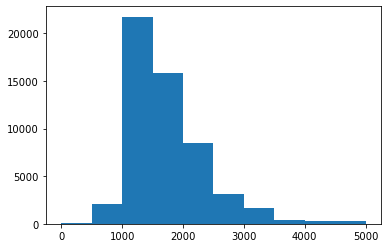

In [16]:
plt.hist(data['Ingresos'], range=(0, 5000));

In [17]:
data.loc[data['Ingresos'] <= 1000, 'Income'] = "0-1000"
data.loc[(data['Ingresos'] > 1000) & (data['Ingresos'] <= 1500), 'Income'] = "1000-1500"
data.loc[(data['Ingresos'] > 1500) & (data['Ingresos'] <= 2000), 'Income'] = "1500-2000"
data.loc[(data['Ingresos'] > 2000) & (data['Ingresos'] <= 3000), 'Income'] = "2000-3000"
data.loc[data['Ingresos'] > 3000, 'Income'] = "+3000"
data.head()

Fecha Alta Cliente Modelo Caldera Provincia  Gender    Pais  Born Date  \
0 2014-01-01      17         Biasi   Alicante  Hombre  España 1973-05-19   
1 2014-01-01      54         Biasi   Alicante  Hombre  España 1976-05-08   
2 2014-01-01      84         Biasi   Valencia  Hombre  España 1982-03-15   
3 2014-01-01     103         Biasi   Alicante  Hombre  España 1976-02-02   
4 2014-01-01     110         Biasi   Alicante   Mujer  España 1989-07-31   

    Tipo Propiedad Situacion Laboral Estado Civil  Ingresos  Pagos Anuales  \
0  Propiedad Total          Autonomo       Casado      2500             14   
1  Propiedad Total            Parado      Soltero      1200             14   
2  Propiedad Total  Trabajo Temporal      Soltero       800             14   
3  Propiedad Total          Autonomo       Casado      1500             12   
4  Propiedad Total            Parado      Soltero      1000             12   

  Fecha Estado  Estado Tipo Inmueble  Financiado Precio Contado  Precio Total  \
0   2016-09-14       1          Casa  Financiado    Promo 0 EUR           399   
1   2016-12-29       1          Piso  Financiado    Promo 0 EUR           399   
2   2017-02-24       1          Casa  Financiado    0 - 100 EUR           399   
3   2014-01-01       0          Casa  Financiado    Promo 0 EUR           399   
4   2017-03-11       1          Piso  Financiado    Promo 0 EUR           399   

   Quejas  Incidencias  Consumo Mes       Edad Rango_Edad     Income  
0       1            0       441.63  40.649315      40-50  2000-3000  
1       0            0       152.57  37.676712      30-40  1000-1500  
2       1            0       288.73  31.821918      30-40     0-1000  
3       1            0       103.97  37.939726      30-40  1000-1500  
4       0            8       145.43  24.438356      18-30     0-1000

In [18]:
tab1 = pd.crosstab(data["Income"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Income"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado         0      1    All         0         1
Income                                            
+3000       1687    448   2135  0.790164  0.209836
0-1000      6979   3147  10126  0.689216  0.310784
1000-1500  18436   6408  24844  0.742071  0.257929
1500-2000   9482   3084  12566  0.754576  0.245424
2000-3000   4353   1203   5556  0.783477  0.216523
All        40937  14290  55227  0.741250  0.258750

- Escalado de Quejas, Incidencias y Consumo Mes:

In [19]:
scaler = MinMaxScaler()
data['Quejas_sca'] = scaler.fit_transform(data['Quejas'].values.reshape(-1, 1))
data.head()

Fecha Alta Cliente Modelo Caldera Provincia  Gender    Pais  Born Date  \
0 2014-01-01      17         Biasi   Alicante  Hombre  España 1973-05-19   
1 2014-01-01      54         Biasi   Alicante  Hombre  España 1976-05-08   
2 2014-01-01      84         Biasi   Valencia  Hombre  España 1982-03-15   
3 2014-01-01     103         Biasi   Alicante  Hombre  España 1976-02-02   
4 2014-01-01     110         Biasi   Alicante   Mujer  España 1989-07-31   

    Tipo Propiedad Situacion Laboral Estado Civil  Ingresos  Pagos Anuales  \
0  Propiedad Total          Autonomo       Casado      2500             14   
1  Propiedad Total            Parado      Soltero      1200             14   
2  Propiedad Total  Trabajo Temporal      Soltero       800             14   
3  Propiedad Total          Autonomo       Casado      1500             12   
4  Propiedad Total            Parado      Soltero      1000             12   

  Fecha Estado  Estado Tipo Inmueble  Financiado Precio Contado  Precio Total  \
0   2016-09-14       1          Casa  Financiado    Promo 0 EUR           399   
1   2016-12-29       1          Piso  Financiado    Promo 0 EUR           399   
2   2017-02-24       1          Casa  Financiado    0 - 100 EUR           399   
3   2014-01-01       0          Casa  Financiado    Promo 0 EUR           399   
4   2017-03-11       1          Piso  Financiado    Promo 0 EUR           399   

   Quejas  Incidencias  Consumo Mes       Edad Rango_Edad     Income  \
0       1            0       441.63  40.649315      40-50  2000-3000   
1       0            0       152.57  37.676712      30-40  1000-1500   
2       1            0       288.73  31.821918      30-40     0-1000   
3       1            0       103.97  37.939726      30-40  1000-1500   
4       0            8       145.43  24.438356      18-30     0-1000   

   Quejas_sca  
0    0.035714  
1    0.000000  
2    0.035714  
3    0.035714  
4    0.000000

In [20]:
filename = '../mvp_pkl/quejas_sca.pkl'
quejas_sca = scaler.fit(data['Quejas'].values.reshape(-1, 1))

pickle.dump(quejas_sca, open(filename,'wb'))

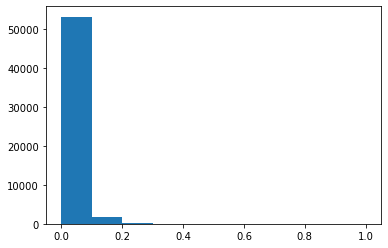

In [21]:
plt.hist(data['Quejas_sca']);

In [22]:
scaler = MinMaxScaler()
data['Incidencias_sca'] = scaler.fit_transform(data['Incidencias'].values.reshape(-1, 1))
data.head()

Fecha Alta Cliente Modelo Caldera Provincia  Gender    Pais  Born Date  \
0 2014-01-01      17         Biasi   Alicante  Hombre  España 1973-05-19   
1 2014-01-01      54         Biasi   Alicante  Hombre  España 1976-05-08   
2 2014-01-01      84         Biasi   Valencia  Hombre  España 1982-03-15   
3 2014-01-01     103         Biasi   Alicante  Hombre  España 1976-02-02   
4 2014-01-01     110         Biasi   Alicante   Mujer  España 1989-07-31   

    Tipo Propiedad Situacion Laboral Estado Civil  Ingresos  Pagos Anuales  \
0  Propiedad Total          Autonomo       Casado      2500             14   
1  Propiedad Total            Parado      Soltero      1200             14   
2  Propiedad Total  Trabajo Temporal      Soltero       800             14   
3  Propiedad Total          Autonomo       Casado      1500             12   
4  Propiedad Total            Parado      Soltero      1000             12   

  Fecha Estado  Estado Tipo Inmueble  Financiado Precio Contado  Precio Total  \
0   2016-09-14       1          Casa  Financiado    Promo 0 EUR           399   
1   2016-12-29       1          Piso  Financiado    Promo 0 EUR           399   
2   2017-02-24       1          Casa  Financiado    0 - 100 EUR           399   
3   2014-01-01       0          Casa  Financiado    Promo 0 EUR           399   
4   2017-03-11       1          Piso  Financiado    Promo 0 EUR           399   

   Quejas  Incidencias  Consumo Mes       Edad Rango_Edad     Income  \
0       1            0       441.63  40.649315      40-50  2000-3000   
1       0            0       152.57  37.676712      30-40  1000-1500   
2       1            0       288.73  31.821918      30-40     0-1000   
3       1            0       103.97  37.939726      30-40  1000-1500   
4       0            8       145.43  24.438356      18-30     0-1000   

   Quejas_sca  Incidencias_sca  
0    0.035714         0.000000  
1    0.000000         0.000000  
2    0.035714         0.000000  
3    0.035714         0.000000  
4    0.000000         0.470588

In [23]:
filename = '../mvp_pkl/incidencias_sca.pkl'
mt_sca = scaler.fit(data['Incidencias'].values.reshape(-1, 1))

pickle.dump(mt_sca, open(filename,'wb'))

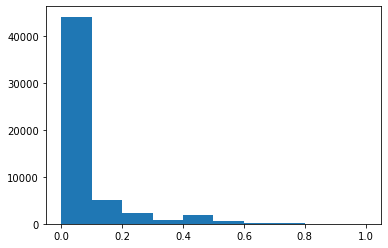

In [24]:
plt.hist(data['Incidencias_sca']);

In [25]:
scaler = MinMaxScaler()
data['Consumo_sca'] = scaler.fit_transform(data['Consumo Mes'].values.reshape(-1, 1))
data.head()

Fecha Alta Cliente Modelo Caldera Provincia  Gender    Pais  Born Date  \
0 2014-01-01      17         Biasi   Alicante  Hombre  España 1973-05-19   
1 2014-01-01      54         Biasi   Alicante  Hombre  España 1976-05-08   
2 2014-01-01      84         Biasi   Valencia  Hombre  España 1982-03-15   
3 2014-01-01     103         Biasi   Alicante  Hombre  España 1976-02-02   
4 2014-01-01     110         Biasi   Alicante   Mujer  España 1989-07-31   

    Tipo Propiedad Situacion Laboral Estado Civil  Ingresos  Pagos Anuales  \
0  Propiedad Total          Autonomo       Casado      2500             14   
1  Propiedad Total            Parado      Soltero      1200             14   
2  Propiedad Total  Trabajo Temporal      Soltero       800             14   
3  Propiedad Total          Autonomo       Casado      1500             12   
4  Propiedad Total            Parado      Soltero      1000             12   

  Fecha Estado  Estado Tipo Inmueble  Financiado Precio Contado  Precio Total  \
0   2016-09-14       1          Casa  Financiado    Promo 0 EUR           399   
1   2016-12-29       1          Piso  Financiado    Promo 0 EUR           399   
2   2017-02-24       1          Casa  Financiado    0 - 100 EUR           399   
3   2014-01-01       0          Casa  Financiado    Promo 0 EUR           399   
4   2017-03-11       1          Piso  Financiado    Promo 0 EUR           399   

   Quejas  Incidencias  Consumo Mes       Edad Rango_Edad     Income  \
0       1            0       441.63  40.649315      40-50  2000-3000   
1       0            0       152.57  37.676712      30-40  1000-1500   
2       1            0       288.73  31.821918      30-40     0-1000   
3       1            0       103.97  37.939726      30-40  1000-1500   
4       0            8       145.43  24.438356      18-30     0-1000   

   Quejas_sca  Incidencias_sca  Consumo_sca  
0    0.035714         0.000000     0.385207  
1    0.000000         0.000000     0.133043  
2    0.035714         0.000000     0.251823  
3    0.035714         0.000000     0.090647  
4    0.000000         0.470588     0.126815

In [26]:
filename = '../mvp_pkl/consumo_sca.pkl'
consumo_sca = scaler.fit(data['Consumo Mes'].values.reshape(-1, 1))

pickle.dump(consumo_sca, open(filename,'wb'))

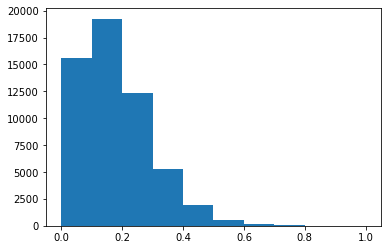

In [27]:
plt.hist(data['Consumo_sca']);

<a id='encoding'></a>
## Enconding con ``target encoding``

In [28]:
data.columns

Index(['Fecha Alta', 'Cliente', 'Modelo Caldera', 'Provincia', 'Gender',
       'Pais', 'Born Date', 'Tipo Propiedad', 'Situacion Laboral',
       'Estado Civil', 'Ingresos', 'Pagos Anuales', 'Fecha Estado', 'Estado',
       'Tipo Inmueble', 'Financiado', 'Precio Contado', 'Precio Total',
       'Quejas', 'Incidencias', 'Consumo Mes', 'Edad', 'Rango_Edad', 'Income',
       'Quejas_sca', 'Incidencias_sca', 'Consumo_sca'],
      dtype='object')

In [29]:
data_filtered = data[['Gender', 'Tipo Inmueble', 'Tipo Propiedad', 'Situacion Laboral', 'Estado Civil', 
                      'Provincia', 'Pais', 'Rango_Edad', 'Income', 'Precio Contado', 'Pagos Anuales', 'Precio Total',
                      'Quejas_sca', 'Incidencias_sca', 'Consumo_sca', 'Estado']]
data_filtered.columns

Index(['Gender', 'Tipo Inmueble', 'Tipo Propiedad', 'Situacion Laboral',
       'Estado Civil', 'Provincia', 'Pais', 'Rango_Edad', 'Income',
       'Precio Contado', 'Pagos Anuales', 'Precio Total', 'Quejas_sca',
       'Incidencias_sca', 'Consumo_sca', 'Estado'],
      dtype='object')

In [30]:
X = data_filtered.drop(['Estado'],axis=1)
y = data_filtered['Estado']

In [31]:
from sklearn.model_selection import train_test_split
X_train_prev, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [32]:
features_TE = ['Gender', 'Tipo Inmueble', 'Tipo Propiedad', 'Situacion Laboral', 'Estado Civil', 'Precio Total',
               'Provincia', 'Pais', 'Rango_Edad', 'Income', 'Precio Contado', 'Pagos Anuales']

In [33]:
from category_encoders import TargetEncoder

TE_encoder = TargetEncoder(cols=features_TE)

In [34]:
X_train_prev.head()

Gender Tipo Inmueble   Tipo Propiedad Situacion Laboral Estado Civil  \
25918  Hombre          Casa  Propiedad Total          Jubilado       Casado   
5305   Hombre          Piso          Empresa          Autonomo       Casado   
38504  Hombre          Casa  Propiedad Total      Trabajo Fijo       Casado   
35496  Hombre          Piso  Propiedad Total          Jubilado        Viudo   
8046   Hombre          Piso  Propiedad Total          Autonomo       Casado   

      Provincia           Pais Rango_Edad     Income Precio Contado  \
25918  Alicante         España      60-70     0-1000    0 - 100 EUR   
5305   Alicante         España      40-50  1000-1500    0 - 100 EUR   
38504  Alicante  Union Europea      40-50  1500-2000    0 - 100 EUR   
35496  Alicante         España        +80  1000-1500  100 - 200 EUR   
8046   Valencia         España      60-70  1000-1500  100 - 200 EUR   

       Pagos Anuales  Precio Total  Quejas_sca  Incidencias_sca  Consumo_sca  
25918             12           399    0.035714         0.000000     0.234751  
5305              14           399    0.000000         0.000000     0.059634  
38504             14           399    0.000000         0.000000     0.299881  
35496             12           499    0.000000         0.000000     0.061728  
8046              14           499    0.000000         0.117647     0.081836

In [35]:
TE_encoder.fit(X_train_prev, y_train)
X_train = TE_encoder.transform(X_train_prev)
X_train.head()

C:\Users\alber\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Gender  Tipo Inmueble  Tipo Propiedad  Situacion Laboral  Estado Civil  \
25918  0.2536       0.207625        0.229333           0.144286      0.219828   
5305   0.2536       0.210947        0.272727           0.337908      0.219828   
38504  0.2536       0.207625        0.229333           0.219986      0.219828   
35496  0.2536       0.210947        0.229333           0.144286      0.183570   
8046   0.2536       0.210947        0.229333           0.337908      0.219828   

       Provincia      Pais  Rango_Edad    Income  Precio Contado  \
25918   0.220812  0.254659    0.145050  0.311213        0.326792   
5305    0.220812  0.254659    0.277612  0.257715        0.326792   
38504   0.220812  0.250320    0.277612  0.244343        0.326792   
35496   0.220812  0.254659    0.163866  0.257715        0.237826   
8046    0.272935  0.254659    0.145050  0.257715        0.237826   

       Pagos Anuales  Precio Total  Quejas_sca  Incidencias_sca  Consumo_sca  
25918       0.282987      0.312914    0.035714         0.000000     0.234751  
5305        0.234842      0.312914    0.000000         0.000000     0.059634  
38504       0.234842      0.312914    0.000000         0.000000     0.299881  
35496       0.282987      0.250299    0.000000         0.000000     0.061728  
8046        0.234842      0.250299    0.000000         0.117647     0.081836

In [36]:
filename = '../mvp_pkl/TE_encoder.pkl'

pickle.dump(TE_encoder.fit(X_train_prev, y_train), open(filename,'wb'))

C:\Users\alber\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [37]:
X_test = TE_encoder.transform(X_test)
X_test.head()

Gender  Tipo Inmueble  Tipo Propiedad  Situacion Laboral  \
15591  0.253600       0.210947        0.229333           0.337908   
27726  0.278034       0.210947        0.229333           0.337908   
16792  0.253600       0.207625        0.229333           0.460733   
23233  0.253600       0.210947        0.229333           0.337908   
24836  0.253600       0.207625        0.229333           0.219986   

       Estado Civil  Provincia      Pais  Rango_Edad    Income  \
15591      0.370321   0.272935  0.254659    0.196224  0.244343   
27726      0.370321   0.272935  0.254659    0.378727  0.257715   
16792      0.219828   0.220812  0.254659    0.196224  0.257715   
23233      0.219828   0.343207  0.254659    0.378727  0.257715   
24836      0.219828   0.343207  0.254659    0.378727  0.244343   

       Precio Contado  Pagos Anuales  Precio Total  Quejas_sca  \
15591        0.326792       0.282987      0.312914    0.000000   
27726        0.185057       0.234842      0.195478    0.000000   
16792        0.326792       0.234842      0.312914    0.000000   
23233        0.308267       0.234842      0.312914    0.035714   
24836        0.237826       0.234842      0.250299    0.000000   

       Incidencias_sca  Consumo_sca  
15591         0.000000     0.107919  
27726         0.000000     0.021408  
16792         0.000000     0.210002  
23233         0.411765     0.042248  
24836         0.000000     0.280463

<a id='ml'></a>
## Machine Learning

Se implementan los mismos modelos que en el notebook anterior, creando en este caso archivos `.pkl` con los modelos entrenados para ser utilizados en el notebook 04.

### Regresión Logística

Logistic Accuracy is 0.73
Cross Validation Score = 0.73
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      8188
           1       0.48      0.70      0.57      2858

    accuracy                           0.73     11046
   macro avg       0.68      0.72      0.69     11046
weighted avg       0.78      0.73      0.74     11046



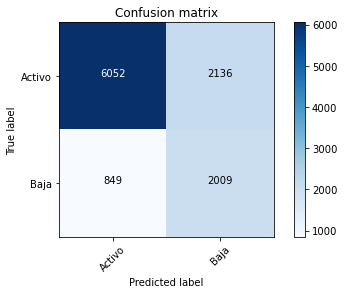

In [39]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 0, max_iter=1000, class_weight="balanced")
LR.fit(X_train,y_train) 
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_LR = cross_val_score(LR, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_LR)

y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

# Almacenar el recall de '1' en una variable para mostrar resultados al final del notebook

result = classification_report(y_test, y_pred, output_dict=True)
recall_lr = round(result['1']['recall'], 4)

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.79


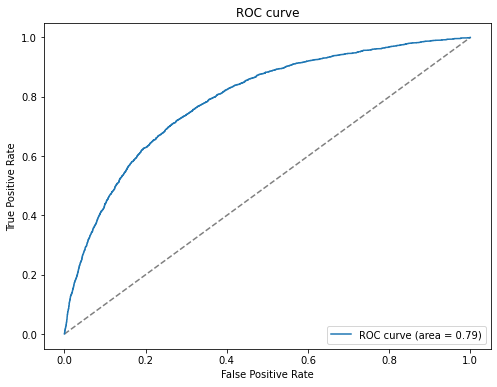

In [36]:
plot_roc_curve(LR, X_test, y_test)

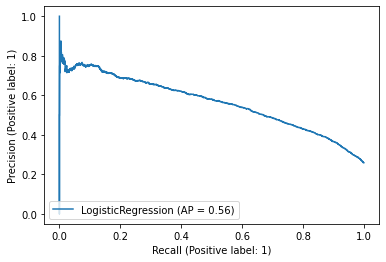

In [37]:
plot_precision_recall_curve(LR, X_test, y_test);

In [43]:
filename = '../mvp_pkl/LR_model.pkl'
LR_model = LR.fit(X_train, y_train)

pickle.dump(LR_model, open(filename,'wb'))

### KNN

Se logran resultados poco satisfactorios con este algoritmo, por lo que no se crea el archivo *pickle* en este caso.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

<div class="alert alert-block alert-warning">
<b>GridSearchCV:</b> Tiempo de ejecución alto
</div>

In [50]:
skf = StratifiedKFold(n_splits=5)
knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid = {'n_neighbors':np.arange(3,17,2)},
                      scoring = 'recall', cv = skf)

knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15])},
             scoring='recall')

In [51]:
knn.best_params_

{'n_neighbors': 3}

In [39]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      8188
           1       0.54      0.42      0.47      2858

    accuracy                           0.76     11046
   macro avg       0.67      0.65      0.66     11046
weighted avg       0.74      0.76      0.75     11046



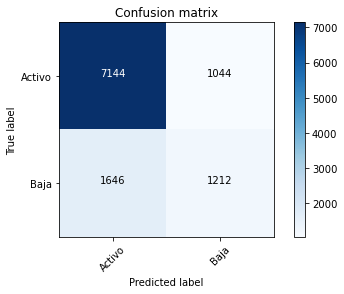

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))

result = classification_report(y_test, y_pred, output_dict=True)
recall_knn = round(result['1']['recall'], 4)

plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.71


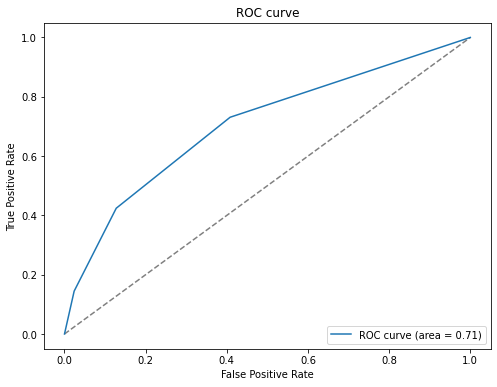

In [42]:
plot_roc_curve(knn, X_test, y_test)

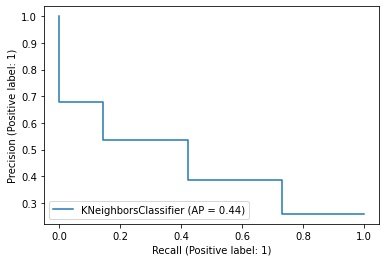

In [43]:
plot_precision_recall_curve(knn, X_test, y_test);

### Decision Tree Classifier

Decision Tree Accuracy is 0.72
Cross Validation Score = 0.71
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      8188
           1       0.47      0.73      0.57      2858

    accuracy                           0.72     11046
   macro avg       0.68      0.72      0.68     11046
weighted avg       0.78      0.72      0.73     11046



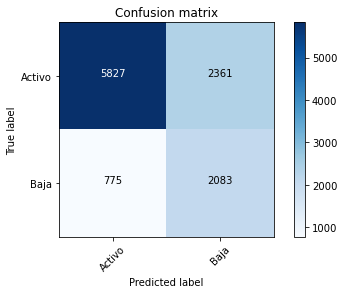

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

DT = DecisionTreeClassifier(random_state = 0,class_weight="balanced", min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_DT = cross_val_score(DT, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_DT)

y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

result = classification_report(y_test, y_pred, output_dict=True)
recall_dt = round(result['1']['recall'], 4)

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.79


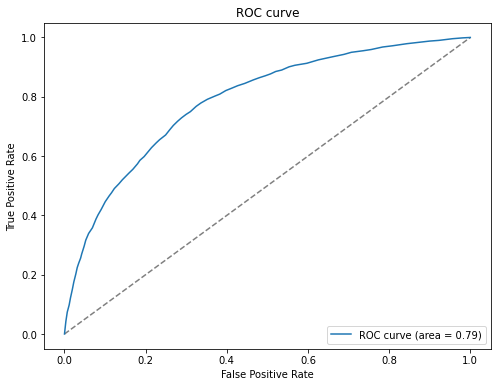

In [45]:
plot_roc_curve(DT, X_test, y_test)

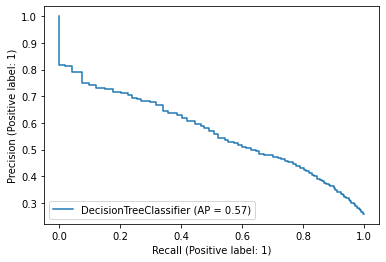

In [46]:
plot_precision_recall_curve(DT, X_test, y_test);

In [53]:
filename = '../mvp_pkl/DT_model.pkl'
DT_model = DT.fit(X_train, y_train)

pickle.dump(DT_model, open(filename,'wb'))

### Random Forest Classifier

Random Forest Accuracy is 0.79
Cross Validation Score = 0.78
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      8188
           1       0.58      0.61      0.60      2858

    accuracy                           0.79     11046
   macro avg       0.72      0.73      0.73     11046
weighted avg       0.79      0.79      0.79     11046



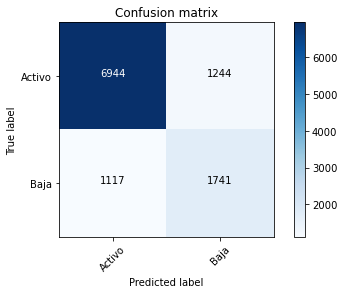

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))

skf = StratifiedKFold(n_splits=20)
score_rfc = cross_val_score(rfc, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_rfc)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))

result = classification_report(y_test, y_pred, output_dict=True)
recall_rfc = round(result['1']['recall'], 4)

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.81


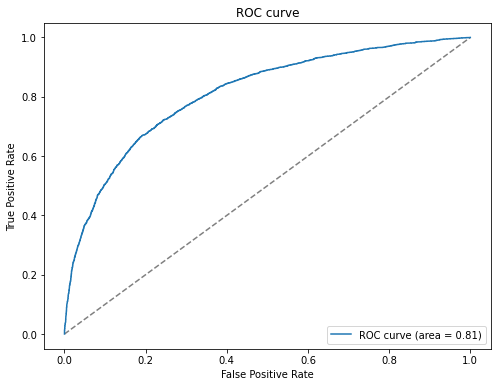

In [48]:
plot_roc_curve(rfc, X_test, y_test)

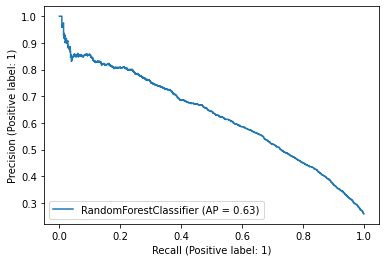

In [49]:
plot_precision_recall_curve(rfc, X_test, y_test);

#### Random Forest parameter tuning

<div class="alert alert-block alert-warning">
<b>GridSearchCV:</b> Tiempo de ejecución alto
</div>

In [78]:
# Don´t do this!!!

from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=3)

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, None],
    'max_features': ['auto', 5, 10],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 5],
    'n_estimators': [100, 300]
}

rfc_2 = GridSearchCV(estimator = RandomForestClassifier(class_weight="balanced"), param_grid = param_grid, 
                          cv = skf, n_jobs = -1, verbose = 2, scoring = 'recall_macro')

rfc_2.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 5, 10],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300]},
             scoring='recall_macro', verbose=2)

In [79]:
rfc_2.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 300}

Random Forest Accuracy is 0.77
Cross Validation Score = 0.77
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      8188
           1       0.55      0.64      0.59      2858

    accuracy                           0.77     11046
   macro avg       0.71      0.73      0.72     11046
weighted avg       0.79      0.77      0.78     11046



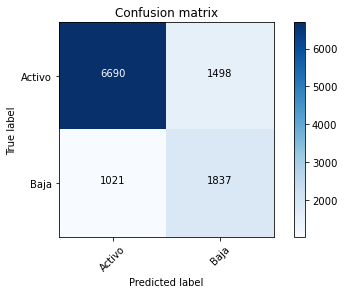

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc_2 = RandomForestClassifier(min_samples_leaf = 3, 
                                       min_samples_split = 5,
                                       max_depth = None,
                                       n_estimators = 300, 
                                       max_features = 'auto', 
                                       bootstrap = False, class_weight = "balanced")
rfc_2.fit(X_train, y_train)
y_pred = rfc_2.predict(X_test)

print("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, y_pred))

skf = StratifiedKFold(n_splits=10)
score_rfc2 = cross_val_score(rfc_2, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_rfc2)

print(classification_report(y_test,y_pred ))

result = classification_report(y_test, y_pred, output_dict=True)
recall_rfc2 = round(result['1']['recall'], 4)

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [58]:
filename = '../mvp_pkl/rfc_model.pkl'
rfc_model = rfc_2.fit(X_train, y_train)

pickle.dump(rfc_model, open(filename,'wb'))

ROC AUC score: 0.81


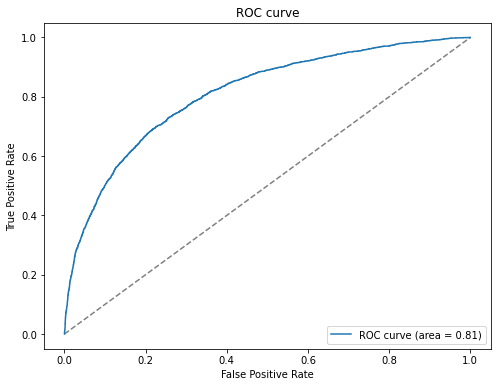

In [51]:
plot_roc_curve(rfc_2, X_test, y_test);

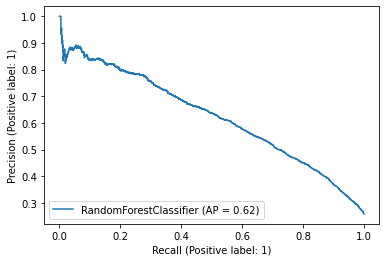

In [52]:
plot_precision_recall_curve(rfc_2, X_test, y_test);

### XGBoost

GradientBoost Accuracy= 0.80
Cross Validation Score = 0.80
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      8188
           1       0.70      0.44      0.54      2858

    accuracy                           0.80     11046
   macro avg       0.76      0.69      0.71     11046
weighted avg       0.79      0.80      0.79     11046



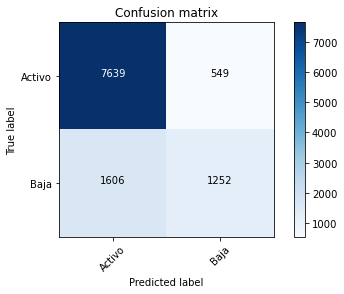

In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, booster='gbtree', learning_rate=0.01, objective='binary:logistic')
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print ("GradientBoost Accuracy= %2.2f" % accuracy_score(y_test, y_pred))

skf = StratifiedKFold(n_splits=5)
score_xgb = cross_val_score(xgb, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_xgb)

print(classification_report(y_test, y_pred))
result = classification_report(y_test, y_pred, output_dict=True)
recall_xgb = round(result['1']['recall'], 4)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.82


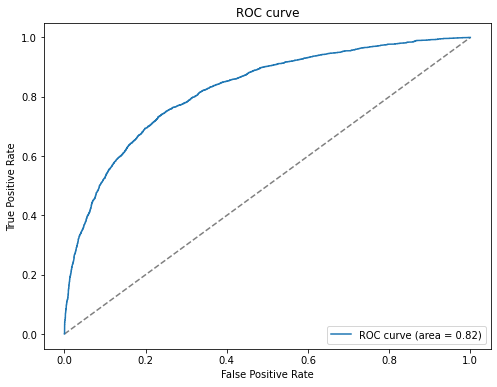

In [54]:
plot_roc_curve(xgb, X_test, y_test)

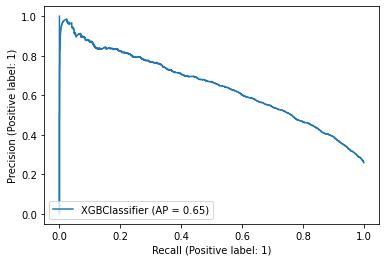

In [55]:
plot_precision_recall_curve(xgb, X_test, y_test);

### Voting Classifier

Utilizando la Regresión Logística, el Decission Tree Classifier y el Random Forest con los hiperparámetros tuneados.

VotingClassifier Accuracy= 0.75
Cross Validation Score = 0.74
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      8188
           1       0.51      0.71      0.60      2858

    accuracy                           0.75     11046
   macro avg       0.70      0.74      0.71     11046
weighted avg       0.79      0.75      0.76     11046



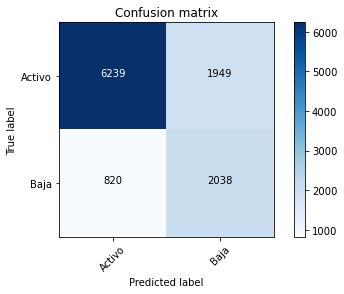

In [56]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
         ('lr', LR), ('rf', rfc_2), ('dt', DT)],
         voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print ("VotingClassifier Accuracy= %2.2f" % accuracy_score(y_test, y_pred))

skf = StratifiedKFold(n_splits=5)
score_voting_clf = cross_val_score(voting_clf, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_voting_clf)

print(classification_report(y_test, y_pred))
result = classification_report(y_test, y_pred, output_dict=True)
recall_voting = round(result['1']['recall'], 4)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [65]:
filename = '../mvp_pkl/voting_clf_model.pkl'
voting_clf_model = voting_clf.fit(X_train, y_train)

pickle.dump(voting_clf_model, open(filename,'wb'))

ROC AUC score: 0.81


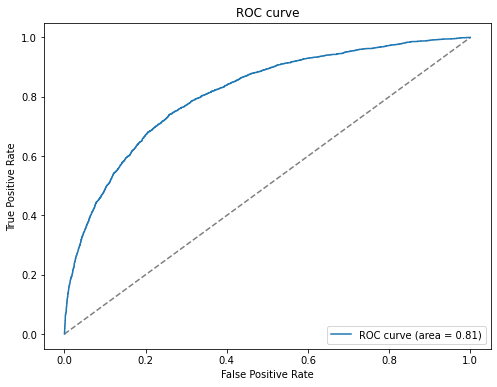

In [57]:
plot_roc_curve(voting_clf, X_test, y_test);

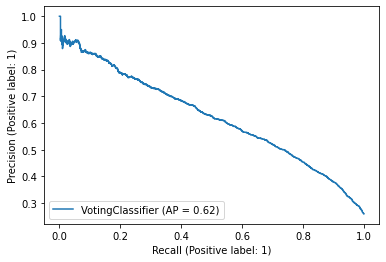

In [58]:
plot_precision_recall_curve(voting_clf, X_test, y_test);

<a id='results'></a>
## Results

- Comparing ROC Curves
- Comparing PR Curves
- Feature Importances
- Results Resume

### Comparing ROC Curves

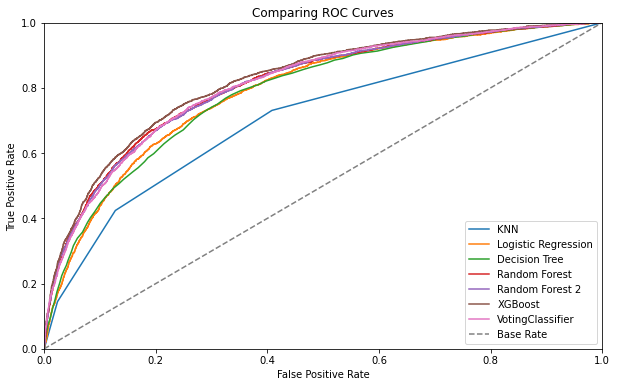

In [59]:
plt.figure(figsize = (10,6), linewidth= 1)

knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
rfc2_fpr, rfc2_tpr, thresholds = roc_curve(y_test, rfc_2.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
vc_fpr, vc_tpr, thresholds = roc_curve(y_test, voting_clf.predict_proba(X_test)[:,1])

plt.plot(knn_fpr, knn_tpr, label='KNN' )
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression')
plt.plot(DT_fpr, DT_tpr, label='Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
plt.plot(rfc2_fpr, rfc2_tpr, label='Random Forest 2')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot(vc_fpr, vc_tpr, label='VotingClassifier')

plt.plot([0,1],[0,1],label='Base Rate', ls = '--', c = 'grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Comparing ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Comparing PR Curves

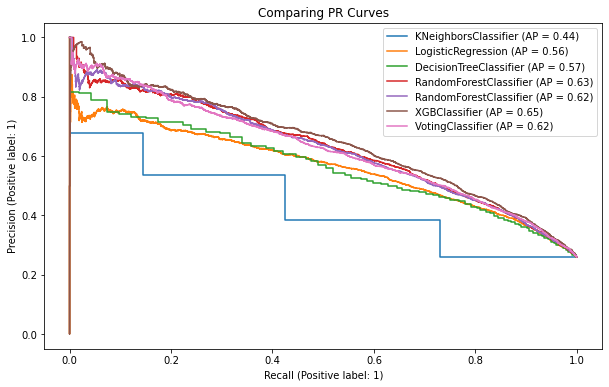

In [60]:
models = [knn, LR, DT, rfc, rfc_2, xgb, voting_clf]

fig, ax = plt.subplots(figsize=(10, 6))
for m in models:
    plot_precision_recall_curve(m, X_test, y_test, ax=ax)
    plt.legend(loc="upper right")
ax.set_title("Comparing PR Curves");

### Feature importances

[0.0230975  0.07479109 0.037827   0.03656059 0.03273306 0.04307129
 0.0288085  0.07127664 0.06251379 0.0389346  0.03754645 0.03500372
 0.05353045 0.10160804 0.32269726]


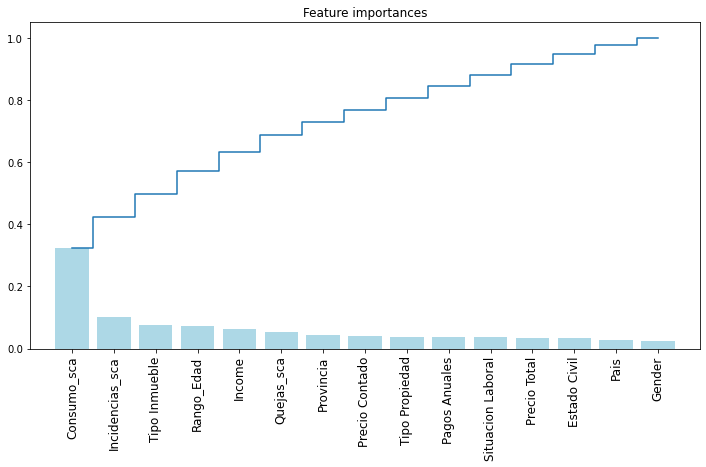

In [37]:
# Using DecisionTreeClassifier model function
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = data_filtered.drop(['Estado'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=12)
plt.xlim([-1, len(indices)])
plt.show()

### Results Resume

In [64]:
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Add table data
table_data = [['Model', 'Recall 1'],
              ['Logistic Regression', recall_lr],
              ['Decision Tree', recall_dt],
              ['RFC_1', recall_rfc],
              ['RFC_2', recall_rfc2],
              ['XGBoost', recall_xgb],
              ['Voting Class.', recall_voting]]

fig = ff.create_table(table_data, height_constant=60)

models = ['Logistic Regression', 'Decision Tree', 'RFC_1', 'RFC_2', 'XGBoost', 'Voting Class.']
recalls = [recall_lr, recall_dt, recall_rfc, recall_rfc2, recall_xgb, recall_voting]
              
# Make traces for graph
fig.add_trace(go.Bar(x=models, y=recalls,
                    marker=dict(color='#2256b5'),
                    name='Recall',
                    xaxis='x2', yaxis='y2'))

fig.update_layout(
    title_text = 'Recall de las Bajas de cada modelo',
    margin = {'t':50, 'b':100},
    xaxis = {'domain': [0, .3]},
    xaxis2 = {'domain': [0.4, 1.]},
    yaxis2 = {'anchor': 'x2', 'title': 'Recall'}
)

fig.show()

Resultado de ejecutar la celda anterior:
    
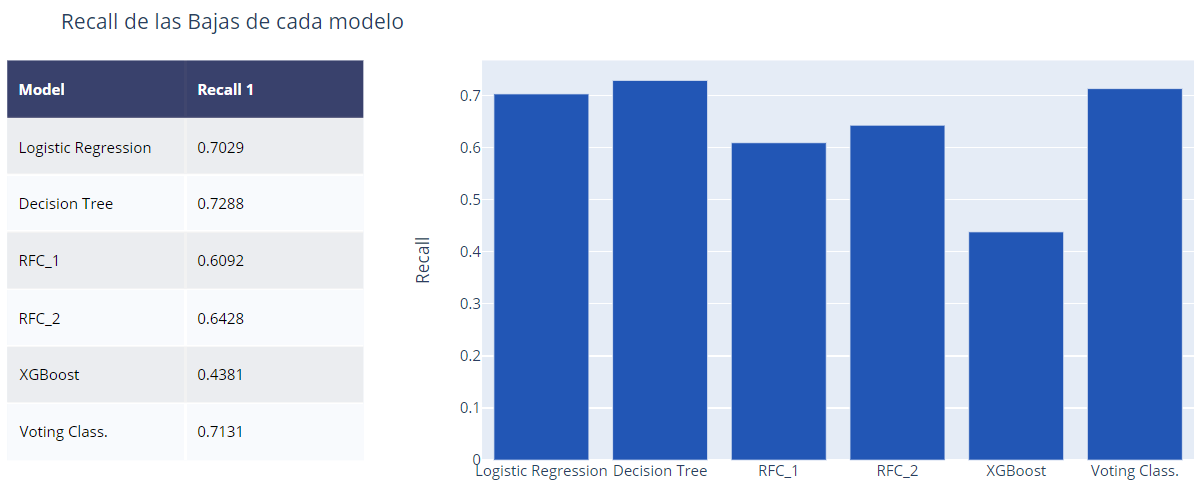